# Theory/Computation Problems

### Problem 1 (20 points) 

Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

## <span color = 'green'> Solution to Problem 1 </span>
<hr style="height:3px">

We have,
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$

To Show: Zero Gradient of the function is a saddle (i.e. hessian in indefinite).

Its gradient is: 

$$
\begin{aligned} 
    \nabla_{x} f= g = \begin{pmatrix}4x_{1}-4x_{2}\\\ -4x_{1}+3x_{2}+1\end{pmatrix}
\end{aligned}
$$

Set $g$ = 0

$$
\begin{aligned}
    \begin{pmatrix} 4x_{1}-4x_{2}\\\ -4x_{1}+3x_{2}+1\end{pmatrix} = \begin{pmatrix}0 \\\ 0 \end{pmatrix}
\end{aligned}
$$

On solving, we get $(x_{1}, x_{2}) = (1, 1)$, i.e. the gradient is zero at (1, 1). 

Then, calculate hessian at $x_{1} = 1$ and $x_{2} = 1$

$$ 
\begin{aligned} 
    H(x_{1},x_{2}) & = \begin{pmatrix}\frac{\partial^{2}{f}}{\partial{x_{1}^2}} & \frac{\partial^{2}{f}}{\partial{x_{1}x_{2}}} \\\ \frac{\partial^{2}{f}}{\partial{x_{2}x_{1}}} & \frac{\partial^{2}{f}}{\partial{x_{2}^2}} \end{pmatrix} \\ \\
& = \begin{pmatrix}4 & -4 \\\ -4 & 3 \end{pmatrix}
\end{aligned}
$$

Now that we have the Hessian matrix, we can find its eigen values: 

$$ 
\begin{aligned} 
 \begin{vmatrix}H - \lambda I\end{vmatrix} & = 0 \\
& \implies (4 - \lambda) (3 - \lambda) - 16 & = 0 \\
& \implies \lambda^{2} - 7\lambda - 4 & = 0 \\ \\
\end{aligned}
$$
On solving, we get 
$$ 
\mathbf{\lambda_{1} = -0.5311, \;\; \lambda_{2} = 7.5311} \\
$$

And the corresponding eigen vectors are:

$u = \begin{pmatrix}-0.6618 \\\  -0.7497 \end{pmatrix}$ and $v = \begin{pmatrix}-0.7497  \\\  0.6618\end{pmatrix}$

We can see that the Hessian has both positive and negative eigen values i.e. there exists saddle point. To further show that the saddle occurs at zero gradient, we can use Taylor's expansion in the neighborhood of (1, 1) to see if $f$ increases in one and decreases in another direction. 

Let $x^* = (1, 1)$, then $f_{*} = 0.5$ 

$$ 
\begin{aligned} 
f(x^*+\epsilon x) & = f_{*} + \epsilon \require{cancelto} \cancelto{0}{g_{*}^{T}}X + \frac{\epsilon^2}{2}X^{T}H_{*}X + O(e^2) 
\end{aligned}\\
$$


Then, along u and v, we can write:
$$ 
\begin{aligned} 
f(x^*+\epsilon u) & = f_{*} + \frac{\epsilon^2}{2}u^{T}H_{*}u + O(e^2)\\
\text{But, }H_{*}u = \lambda_{1}u \\ 
& = f_{*} + \frac{\epsilon^2}{2}\lambda_{1}u^{T}u + O(e^2)
\end{aligned}
$$

Similarly, 
$$ 
\begin{aligned} 
f(x^*+\epsilon v) & = f_{*} + \frac{\epsilon^2}{2}\lambda_{2}v^{T}u + O(e^2)
\end{aligned}
$$
Then, clearly, 

$$
\begin{aligned} 
f(x^* + \epsilon u) < f(x^*) < f(x^* + \epsilon v)
\end{aligned}
$$

<br> <br>
$$\textbf{Hence, we can say that $f$ has a saddle point at (1, 1)}$$

We can plot the above function and see the behavior at (1, 1) as well: 

<IPython.core.display.Javascript object>


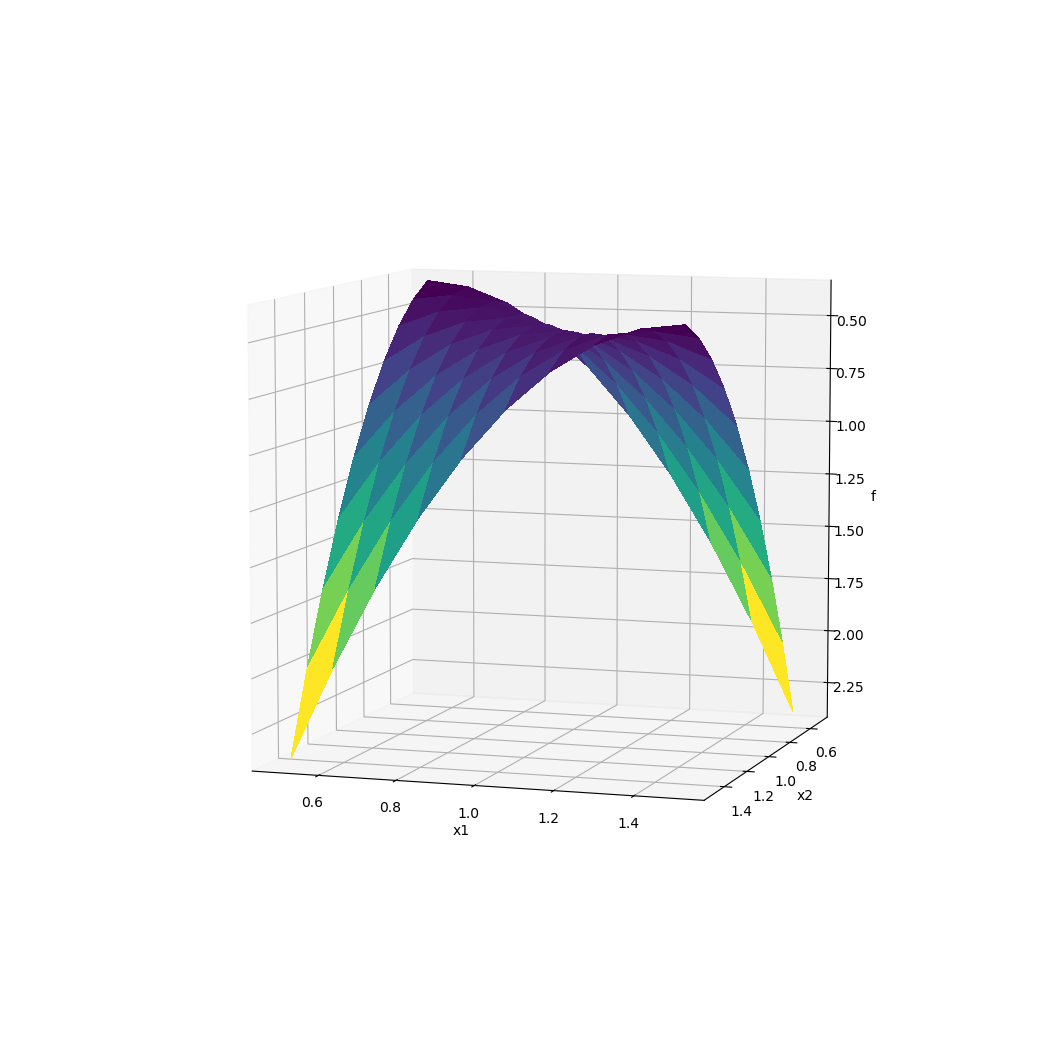

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import time
#%matplotlib qt

%matplotlib notebook

#plt.xticks(rotation=90)

fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
ax = fig.gca(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

# Make data.
X = np.linspace(0.5, 1.5, 10)
Y = np.linspace(0.5, 1.5, 10)
X, Y = np.meshgrid(X, Y)
Z = 2*np.square(X) - 4*np.multiply(X,Y)+ 1.5*np.square(Y)+Y

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

<hr style="height:3px">
<hr style="height:3px">

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

## <span color = 'green'> Solution to Problem 2 - Part I </span>
<hr style="height:3px">

Given, 

Plane in $\mathbb{R}^3 : x_{1} + 2x_{2} + 3x_{3} = 1 $


And the point of interest is: $(-1, 0, 1)^{T}$

We want to find the point in the given plane $f$ that is nearest to the point of interest, i.e. We want to minimize the distance function between some arbitrary point $(x, y, z)$ and the point $(-1, 0, 1)$. The values of $(x, y, z)$ that minimizes this distance function is the point in the plane nearest to the given point. 

The distance function $f_{d}$ can be formulated as:

$$
\begin{aligned} 
f_{d} = \sqrt{(x+1)^{2} + (y-0)^{2} + (z-1)^{2}}  
\end{aligned}
$$

The point $(x, y, z)$ must also satisfy the equation of the plane, i.e.

$$
x + 2y + 3z = 1\\ \\
\text{substituting $x, y, z$ from the equation of plane we get:} \\ \\
f_{d} = \sqrt{\left(2-2y - 3z\right)^{2} + \left(\frac{1-x-3z}{2}\right)^{2} + \left(\frac{1-2y-x}{3}-1\right)^{2}}
$$

Then, the optimization problem can be written as an unconstrained one. We can get rid of the square root for faster calculation. 

$$
\begin{aligned} 
\text{minimize:} &\;\;\;\;\left(2-2y - 3z\right)^{2} + \left(\frac{1-x-3z}{2}\right)^{2} + \left(\frac{1-2y-x}{3}-1\right)^{2}
\end{aligned}
$$

The optimization problem was solved using python module scipy.optimize. 

In [119]:
from scipy import optimize
import numpy as np

f = lambda x : (2 -2*x[1] - 3*x[2])**2 + ((1 - x[0] - 3*x[2])/2)**2 + (((1-2*x[1]-x[0])/3)-1)**2

mins = optimize.minimize(fun=f, x0 = [0,0,1/3])

print("The point in the plane nearest to (-1, 0 1) is: ("+ str(mins.x[0]) + ",", str(mins.x[1]) + ",", str(mins.x[2])+")")

The point in the plane nearest to (-1, 0 1) is: (-1.499999727181554, -0.25000091054985474, 0.8333338378334504)


## <span color = 'green'> Alternative Solution to Problem 2 - Part I </span>


Given: 

$$ 
\begin{aligned} 
f(x_{1}, x_{2}, x_{3}) = x_{1} + 2x_{2} + 3x_{3} - 1 
\end{aligned}
$$
And the point of interest is: $(-1, 0, 1)^{T}$

We want to find the point in the given plane $f$ that is nearest to the point of interest, i.e. We want to minimize the distance function between some arbitrary point $(x_{1}, x_{2}, x_{3})$ and the point $(-1, 0, 1)$. The values of $(x_{1}, x_{2}, x_{3})$ that minimizes this distance function is the point in the plane nearest to the given point. 

The distance function $f_{d}$ can be formulated as:

$$
\begin{aligned} 
f_{d} = \sqrt{(x+1)^{2} + (y-0)^{2} + (z-1)^{2}}  
\end{aligned}
$$

Then, the optimization problem is:

$$
\begin{aligned} 
\text{minimize:} &\;\;\;\;\sqrt{(x_{1}+1)^{2} + (x_{2}-0)^{2} + (x_{3}-1)^{2}} 
\end{aligned}
$$

It is obvious that the above optimization problem will lead to trivial solution resulting in the function value of zero. i.e. the solution results in the same point. 

Hence, we should add the constraint, which is the point should lie on the given plane. Now, the optimization problem becomes a constrained one. We can simply square the distance for faster calculation:

$$
\begin{aligned} 
\text{minimize:}\;\;\;\;  & (x_{1}+1)^{2} + (x_{2}-0)^{2} + (x_{3}-1)^{2} \\
\text{subject to:} \;\;\;\; & x_{1} + 2x_{2} + 3x_{3} - 1 = 0 
\end{aligned}
$$

In [121]:
from scipy import optimize
import numpy as np

f = lambda x : (x[0]+1)**2 + x[1]**2 + (x[2]-1)**2

cons = lambda x: x[0] + 2*x[1] + 3*x[2] - 1

cons1 = {'type': 'eq', 'fun': cons}

mins2 = optimize.minimize(fun=f, method='SLSQP', x0=[0,0,0], constraints = cons1)

print("The point in the plane nearest to (-1, 0 1) is: ("+ str(mins2.x[0]) + ",", str(mins2.x[1]) + ",", str(mins2.x[2])+")")


The point in the plane nearest to (-1, 0 1) is: (-1.071428574756227, -0.1428571456767753, 0.7857142887032592)


### Hence, the solution is (-1.0713524140895148, -0.14283810861049065, 0.785676210436832)


To verify that the solution indeed lies in the plane, we can do a quick check:

In [123]:
ff = lambda x: x[0] + 2*x[1] + 3*x[2] - 1 

print(ff(mins2.x))
print("0 means that the point satisfies the equation of the plane!\nAnything else means the point didn't lie on the plane")

0.0
0 means that the point satisfies the equation of the plane!
Anything else means the point didn't lie on the plane


### However, when we check the results from the unconstrained optimization case, we see slight error. 

In [124]:
ff = lambda x: x[0] + 2*x[1] + 3*x[2] - 1 

print(ff(mins.x))
print("0 means that the point satisfies the equation of the plane!\nAnything else means the point didn't lie on the plane")

-0.5000000347809119
0 means that the point satisfies the equation of the plane!
Anything else means the point didn't lie on the plane


<hr style="height:2px">

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

## <span color = 'green'> Solution to Problem 2 - Part II (Gradient Descent)</span>
<hr style="height:3px">

For this problem, we can use the objective function from Part I (unconstrained optimization) of the problem. 

$$
\begin{aligned}
f(x_{1}, x_{2}, x_{3}) =  &\;\;\;\;\left(2-2x_{2} - 3x_{3}\right)^{2} + \left(\frac{1-x_{1}-3x_{3}}{2}\right)^{2} + \left(\frac{1-2x_{2}-x_{1}}{3}-1\right)^{2}
\end{aligned}
$$

And its gradient is:
$$
\begin{aligned}
\nabla f & = \begin{pmatrix}\frac{13x_{1}}{18} + \frac{4x_{2}}{9} + \frac{3x_{3}}{2} - \frac{1}{18} \\\ \frac{4x_{1}}{9} + \frac{80x_{2}}{9} + 12x_{3} - \frac{64}{9} \\\ \frac{3x_{1}}{2} + 12x_{2} + \frac{45x_{3}}{2} - \frac{27}{2}\end{pmatrix}
\end{aligned}
$$

The gradient descent algorithm is:

$x_{new} = x_{old} - \alpha \nabla f(x_{old})$

In [113]:
import numpy as np
X = np.zeros((3))

grad = lambda x: np.array([(13*x[0])/18 + (4*x[1])/9 + (3*x[2])/2 - 1/18, (4*x[0])/9 + (80*x[1])/9 + 12*x[2] - 64/9, (3*x[0])/2 + 12*x[1] + (45*x[2])/2 - 27/2])

def Gradient_Descent(x, grad, alpha, itr):
    for i in range(itr):
        x_new = x - alpha*grad(x)
        x = x_new
        if i % 100 == 0:
            print(x_new)
    return x_new

In [126]:
Gradient_Descent(X, grad, 0.01, 1000)

[0.00055556 0.07111111 0.135     ]
[-0.59240375 -0.03525261  0.65312315]
[-0.96922946 -0.13548469  0.73438306]
[-1.19105727 -0.184804    0.77658654]
[-1.3203674  -0.21228551  0.8004507 ]
[-1.3955793  -0.22810213  0.81423351]
[-1.43930346 -0.23727484  0.82223317]
[-1.46471942 -0.2426038   0.82688149]
[-1.47949281 -0.24570094  0.82958317]
[-1.48807999 -0.24750114  0.83115352]


array([-1.49303369, -0.24853961,  0.8320594 ])

### As expected, the result is same as that obtained in part I (unconstrained). 

### The point is: (-1.49303369, -0.24853961,  0.8320594)

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)